In [1]:
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import numpy as np
import os
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop = set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string 
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [2]:
train = pd.read_csv('C:\\Arya KR\\PERSONAL\\Python\\My projects\\NLP with Disaster tweet\\train.csv')
test = pd.read_csv('C:\\Arya KR\\PERSONAL\\Python\\My projects\\NLP with Disaster tweet\\test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
print('there are {} rows and {} columns in train'.format(train.shape[0],train.shape[1]))
print('there are {} rows and {} columns in test'.format(test.shape[0],test.shape[1]))

there are 7613 rows and 5 columns in train
there are 3263 rows and 4 columns in test


In [5]:
x = train.target.value_counts()
x

0    4342
1    3271
Name: target, dtype: int64

In [6]:
import cufflinks as cf
import chart_studio.plotly as py
from chart_studio.plotly import plot, iplot
import chart_studio.tools as tls
import plotly.graph_objs as go


In [7]:
tls.set_credentials_file(username='aryakr', api_key='MY1reouqXldsCiJbV4iy')

In [8]:
x.iplot(kind = 'bar',filename='target',color=['goldenrod'])

C:\Users\Arya Nivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'samples')

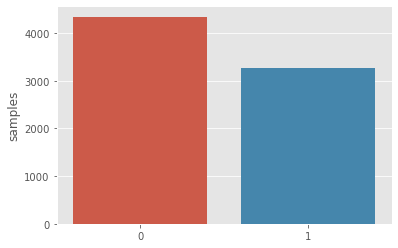

In [9]:
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

**Number of characters in tweets**

In [10]:
train_len_1 = train[train['target'] == 1]['text'].str.len()
train_len_0 = train[train['target'] == 0]['text'].str.len()

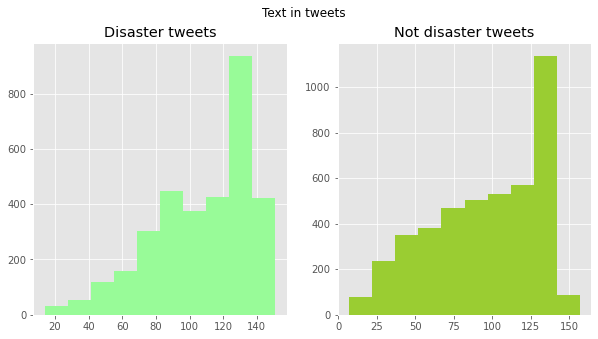

In [11]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))

ax1.hist(train_len_1,color = 'palegreen')
ax1.set_title('Disaster tweets')

ax2.hist(train_len_0,color= 'yellowgreen')
ax2.set_title('Not disaster tweets')

fig.suptitle('Text in tweets')
plt.show()

**Number of words in a tweet**

In [12]:
train_word_len_1 = train[train['target']==1]['text'].str.split().map(lambda x: len(x))
train_word_len_0 = train[train['target']==0]['text'].str.split().map(lambda x: len(x))

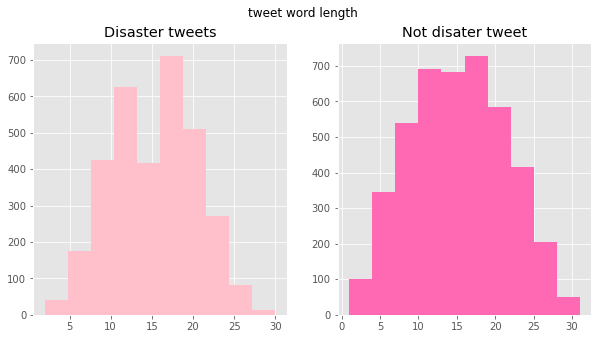

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))

ax1.hist(train_word_len_1,color = 'pink')
ax1.set_title('Disaster tweets')

ax2.hist(train_word_len_0,color = 'hotpink')
ax2.set_title('Not disater tweet')

fig.suptitle('tweet word length')
plt.show()

**Avg word length**

In [14]:
word_len_1 = train[train['target'] == 1]['text'].str.split().apply(lambda x:[len(i) for i in x])
word_len_0 = train[train['target'] == 0]['text'].str.split().apply(lambda x:[len(i) for i in x])

C:\Users\Arya Nivi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Arya Nivi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0.98, 'Average word length in each tweet')

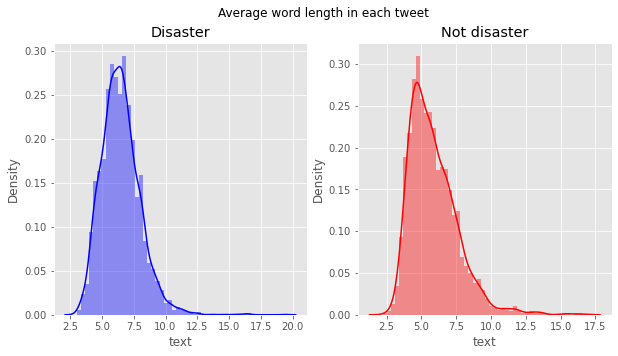

In [15]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))

sns.distplot(word_len_1.map(lambda x:np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Disaster')

sns.distplot(word_len_0.map(lambda x:np.mean(x)),ax = ax2, color = 'red')
ax2.set_title('Not disaster')

fig.suptitle('Average word length in each tweet')

**Common stopwords in tweets**

In [16]:
def all_words(target):
    allwords=[]
    
    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            allwords.append(i)
    return allwords

In [17]:
all_words(0)

["What's",
 'up',
 'man?',
 'I',
 'love',
 'fruits',
 'Summer',
 'is',
 'lovely',
 'My',
 'car',
 'is',
 'so',
 'fast',
 'What',
 'a',
 'goooooooaaaaaal!!!!!!',
 'this',
 'is',
 'ridiculous....',
 'London',
 'is',
 'cool',
 ';)',
 'Love',
 'skiing',
 'What',
 'a',
 'wonderful',
 'day!',
 'LOOOOOOL',
 'No',
 'way...I',
 "can't",
 'eat',
 'that',
 'shit',
 'Was',
 'in',
 'NYC',
 'last',
 'week!',
 'Love',
 'my',
 'girlfriend',
 'Cooool',
 ':)',
 'Do',
 'you',
 'like',
 'pasta?',
 'The',
 'end!',
 'We',
 'always',
 'try',
 'to',
 'bring',
 'the',
 'heavy.',
 '#metal',
 '#RT',
 'http://t.co/YAo1e0xngw',
 'Crying',
 'out',
 'for',
 'more!',
 'Set',
 'me',
 'ablaze',
 'On',
 'plus',
 'side',
 'LOOK',
 'AT',
 'THE',
 'SKY',
 'LAST',
 'NIGHT',
 'IT',
 'WAS',
 'ABLAZE',
 'http://t.co/qqsmshaJ3N',
 '@PhDSquares',
 '#mufc',
 "they've",
 'built',
 'so',
 'much',
 'hype',
 'around',
 'new',
 'acquisitions',
 'but',
 'I',
 'doubt',
 'they',
 'will',
 'set',
 'the',
 'EPL',
 'ablaze',
 'this',
 'seas

In [18]:
allwords_0 = all_words(0)

dic=defaultdict(int)
for word in allwords_0:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

In [19]:
top

[('the', 1524),
 ('a', 1115),
 ('to', 1099),
 ('and', 840),
 ('of', 834),
 ('in', 720),
 ('you', 529),
 ('is', 512),
 ('for', 452),
 ('my', 442)]

<BarContainer object of 10 artists>

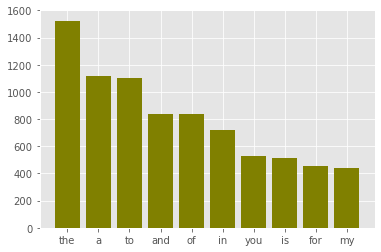

In [20]:
x,y=zip(*top)
plt.bar(x,y,color = 'olive')

In [21]:
allwords_1 = all_words(1)

dic = defaultdict(int)
for word in allwords_1:
    if word in stop:
        dic[word]+=1
        
top = sorted(dic.items(),key = lambda x:x[1],reverse = True)[:10]

<BarContainer object of 10 artists>

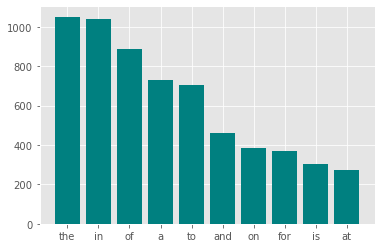

In [22]:
x,y=zip(*top)
plt.bar(x,y,color = 'teal')

>In both cases 'the' is the most used stop word

**Punctuations in the word**

In [23]:
import string
punt = string.punctuation

allword_1 = all_words(1)

dic = defaultdict(int)

for i in allword_1:
    if i in punt:
        dic[i]+=1

<BarContainer object of 18 artists>

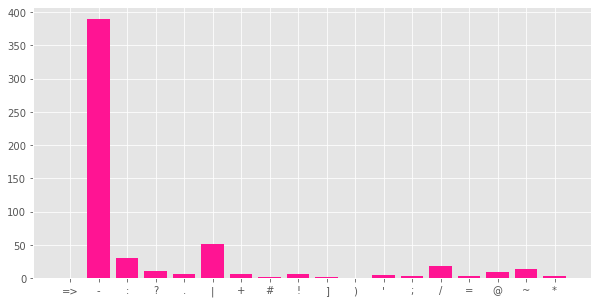

In [24]:
plt.figure(figsize = (10,5))
x,y = zip(*dic.items())
plt.bar(x,y,color = 'deeppink')

<BarContainer object of 20 artists>

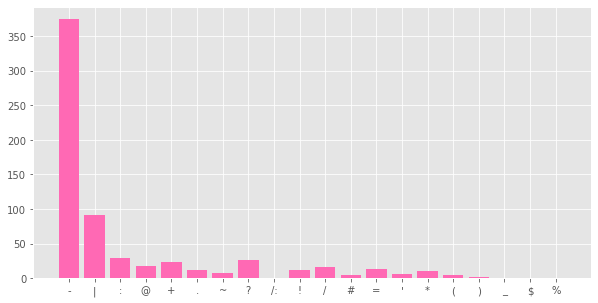

In [25]:
allword_0 = all_words(0)

dic = defaultdict(int)

for i in allword_0:
    if i in punt:
        dic[i]+=1
        
plt.figure(figsize = (10,5))
x,y = zip(*dic.items())
plt.bar(x,y,color = 'hotpink')

>'-' is the most used puntuation in the tweets here.

**Common words**

In [26]:
dic = defaultdict(int)

for i in all_words(0):
    if i not in stop:
        if i not in punt:
            dic[i] += 1


<BarContainer object of 10 artists>

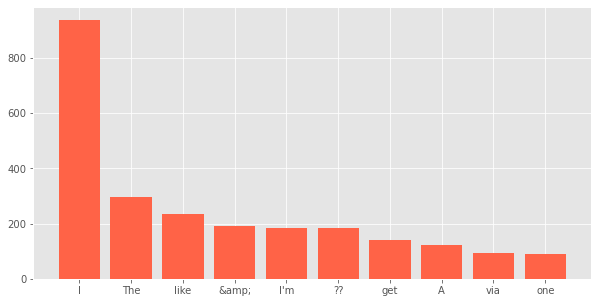

In [27]:
top = sorted(dic.items(),key = lambda x: x[1],reverse = True)[:10]

plt.figure(figsize = (10,5))
x,y = zip(*top)
plt.bar(x,y,color = 'tomato')

<BarContainer object of 10 artists>

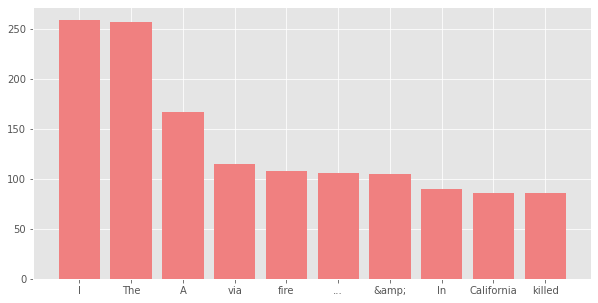

In [28]:
dic = defaultdict(int)

for i in all_words(1):
    if i not in stop:
        if i not in punt:
            dic[i] += 1
            
top = sorted(dic.items(),key = lambda x: x[1],reverse = True)[:10]

plt.figure(figsize = (10,5))
x,y = zip(*top)
plt.bar(x,y,color = 'lightcoral')

# CountVectorizer example

In [29]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',
 ]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names()


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [30]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [31]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names()

['and this',
 'document is',
 'first document',
 'is the',
 'is this',
 'second document',
 'the first',
 'the second',
 'the third',
 'third one',
 'this document',
 'this is',
 'this the']

In [32]:
print(X2.toarray())

[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


In [33]:
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


**###################################################################################################################**

## Data Cleaning

**Remove URLs**

In [34]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [35]:
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"

remove_URL(example)

'New competition launched :'

In [36]:
train['text'] = train['text'].apply(lambda x:remove_URL(x))
test['text'] = test['text'].apply(lambda x:remove_URL(x))

**Remove HTML**

In [37]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)


In [38]:
example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""

print(remove_html(example))


Real or Fake
Kaggle 
getting started



In [39]:
train['text'] = train['text'].apply(lambda x: remove_html(x))
test['text'] = test['text'].apply(lambda x: remove_html(x))

In [40]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [41]:
train['text'] = train['text'].apply(lambda x: remove_punct(x))
test['text'] = test['text'].apply(lambda x: remove_punct(x))

In [42]:
!pip install pyspellchecker

# GloVe for Vectorization

>Global Vectors for Word Representation, or GloVe, is an “unsupervised learning algorithm for obtaining vector representations for words.” Simply put, GloVe allows us to take a corpus of text, and intuitively transform each word in that corpus into a position in a high-dimensional space.

Here we will use GloVe pretrained corpus model to represent our words.It is available in 3 varieties :50D ,100D and 200 Dimentional.  We will try 100 D here.

In [43]:
df=pd.concat([train,test])
df.shape

(10876, 5)

In [44]:
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

In [45]:
corpus = create_corpus(df)

100%|█████████████████████████████████████████████████████████████████████████| 10876/10876 [00:01<00:00, 10499.71it/s]


In [46]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('C:\\Arya KR\\PERSONAL\\Python\\My projects\\NLP with Disaster tweet\\glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [47]:
list(embeddings_index.items())[:4]

[('the',
  array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
         -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
          0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
         -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
          0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
         -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
          0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
          0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
         -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
         -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
         -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
         -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
         -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
         -1.2526

In [48]:
list(embeddings_index.keys())[:4]

['the', ',', '.', 'of']

In [49]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

>**`pad_sequences`** is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence.  
Here 'post', so 0s at the end.

In [50]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 20342


In [51]:
word_index

{'i': 1,
 'the': 2,
 'like': 3,
 'amp': 4,
 'im': 5,
 'a': 6,
 'fire': 7,
 'get': 8,
 'new': 9,
 'via': 10,
 'news': 11,
 'people': 12,
 'one': 13,
 'in': 14,
 'dont': 15,
 'us': 16,
 'emergency': 17,
 'video': 18,
 'disaster': 19,
 'would': 20,
 'this': 21,
 'to': 22,
 'police': 23,
 'still': 24,
 'is': 25,
 'got': 26,
 'you': 27,
 'my': 28,
 'suicide': 29,
 'body': 30,
 'crash': 31,
 'burning': 32,
 'first': 33,
 'storm': 34,
 'rt': 35,
 'attack': 36,
 'time': 37,
 'back': 38,
 'know': 39,
 'california': 40,
 'fires': 41,
 'buildings': 42,
 'see': 43,
 'going': 44,
 'and': 45,
 'man': 46,
 'day': 47,
 'love': 48,
 'two': 49,
 'world': 50,
 'cant': 51,
 'bomb': 52,
 'if': 53,
 'nuclear': 54,
 'full': 55,
 'go': 56,
 'hiroshima': 57,
 'dead': 58,
 'youtube': 59,
 'watch': 60,
 'today': 61,
 'life': 62,
 'think': 63,
 'car': 64,
 'train': 65,
 'last': 66,
 'killed': 67,
 'it': 68,
 'accident': 69,
 'its': 70,
 'good': 71,
 'of': 72,
 'say': 73,
 'we': 74,
 'make': 75,
 'war': 76,
 'no':

>**Tokenizer.word_index**   
fit_on_texts Updates internal vocabulary based on a list of texts. This method creates the vocabulary index based on word frequency. So if you give it something like, `"The cat sat on the mat."` It will create a dictionary s.t.` word_index["the"] = 1; word_index["cat"] = 2` it is word -> index dictionary so every word gets a unique integer value. 0 is reserved for padding. `So lower integer means more frequent word` (often the first few are stop words because they appear a lot).

In [52]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100)) #matrix of zeros

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embeddings_index.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|████████████████████████████████████████████████████████████████████████| 20342/20342 [00:00<00:00, 616428.84it/s]


In [53]:
len(embedding_matrix)

20343

**Baseline model**

In [54]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           2034300   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2,076,605
Trainable params: 42,305
Non-trainable params: 2,034,300
_________________________________________________________________


In [56]:
Train=tweet_pad[:train.shape[0]]
Test=tweet_pad[train.shape[0]:]

In [72]:
test.shape[0]

3263

In [61]:
X_train,X_test,y_train,y_test=train_test_split(Train,train['target'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6471, 50)
Shape of Validation  (1142, 50)


In [63]:
history=model.fit(X_train,y_train,batch_size=4,epochs=15,validation_data=(X_test,y_test),verbose=2)

Epoch 1/15
1618/1618 - 41s - loss: 0.6811 - accuracy: 0.5900 - val_loss: 0.5668 - val_accuracy: 0.7662 - 41s/epoch - 25ms/step
Epoch 2/15
1618/1618 - 70s - loss: 0.5473 - accuracy: 0.7481 - val_loss: 0.5240 - val_accuracy: 0.7583 - 70s/epoch - 43ms/step
Epoch 3/15
1618/1618 - 84s - loss: 0.5262 - accuracy: 0.7631 - val_loss: 0.5121 - val_accuracy: 0.7793 - 84s/epoch - 52ms/step
Epoch 4/15
1618/1618 - 83s - loss: 0.5220 - accuracy: 0.7612 - val_loss: 0.5055 - val_accuracy: 0.7767 - 83s/epoch - 52ms/step
Epoch 5/15
1618/1618 - 83s - loss: 0.5160 - accuracy: 0.7650 - val_loss: 0.4991 - val_accuracy: 0.7767 - 83s/epoch - 51ms/step
Epoch 6/15
1618/1618 - 83s - loss: 0.5054 - accuracy: 0.7724 - val_loss: 0.4938 - val_accuracy: 0.7793 - 83s/epoch - 51ms/step
Epoch 7/15
1618/1618 - 83s - loss: 0.4980 - accuracy: 0.7776 - val_loss: 0.4887 - val_accuracy: 0.7828 - 83s/epoch - 51ms/step
Epoch 8/15
1618/1618 - 83s - loss: 0.4989 - accuracy: 0.7770 - val_loss: 0.4847 - val_accuracy: 0.7837 - 83s/ep

In [66]:
sample_sub = pd.read_csv(r'C:\Arya KR\PERSONAL\Python\My projects\NLP with Disaster tweet\sample_submission.csv')

In [68]:
sample_sub.head(5)

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [69]:
y_pre=model.predict(Test)
y_pre=np.round(y_pre).astype(int).reshape(3263)
sub=pd.DataFrame({'id':sample_sub['id'].values.tolist(),'target':y_pre})
sub.to_csv('submission.csv',index=False)

In [71]:
sub.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
